In [50]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [51]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the dataset
train = pd.read_csv('C:/Users/Toshiba/Desktop/Kifiya AIM 1/Week 4/Technical Content/Data/train.csv')  # Load the train data
test = pd.read_csv('C:/Users/Toshiba/Desktop/Kifiya AIM 1/Week 4/Technical Content/Data/test.csv')    # Load the test data
store = pd.read_csv('C:/Users/Toshiba/Desktop/Kifiya AIM 1/Week 4/Technical Content/Data/store.csv')  # Load the store data


logging.info("Datasets loaded successfully")

# Merge datasets for further analysis
train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

logging.info("Datasets merged successfully")

### Data Cleaning ###

# Handle missing values
train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)
train['Promo2SinceWeek'].fillna(0, inplace=True)
train['Promo2SinceYear'].fillna(0, inplace=True)
train['PromoInterval'].fillna('None', inplace=True)

logging.info("Missing values handled in the training dataset")

# Handle outliers in Sales using z-scores
z_scores = np.abs(stats.zscore(train['Sales']))
train_cleaned = train[(z_scores < 3)]
logging.info("Outliers handled for Sales using z-scores")

# Handle missing data in test dataset similarly
test['CompetitionDistance'].fillna(test['CompetitionDistance'].median(), inplace=True)
test['Promo2SinceWeek'].fillna(0, inplace=True)
test['Promo2SinceYear'].fillna(0, inplace=True)
test['PromoInterval'].fillna('None', inplace=True)



logging.info("Missing values handled in the test dataset")

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_16484\3909712239.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('C:/Users/Toshiba/Desktop/Kifiya AIM 1/Week 4/Technical Content/Data/train.csv')  # Load the train data
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_16484\3909712239.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)
C:\Users\Toshiba\AppData\Local\T

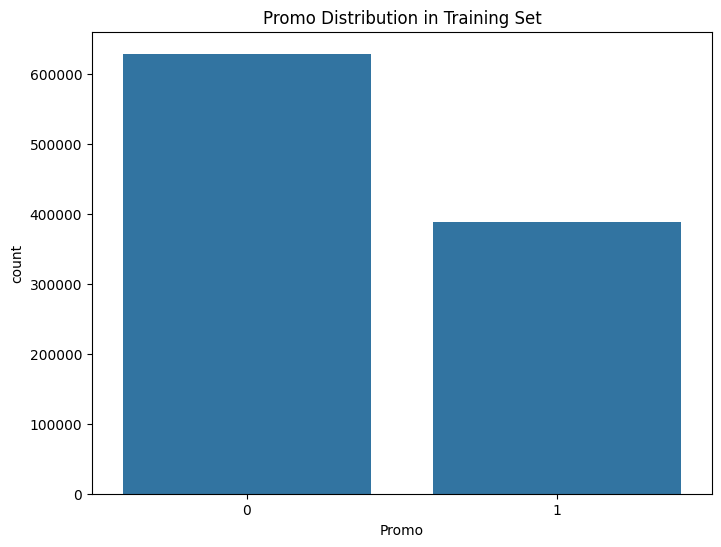

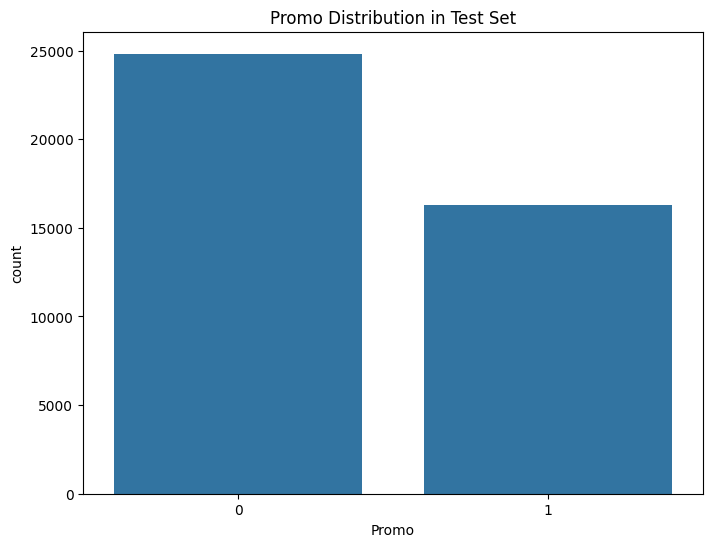

In [52]:

### Exploratory Data Analysis (EDA) ###

## 1. Check for promo distribution in training and test sets
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Promo')
plt.title("Promo Distribution in Training Set")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=test, x='Promo')
plt.title("Promo Distribution in Test Set")
plt.show()

logging.info("Promo distribution in training and test sets visualized")


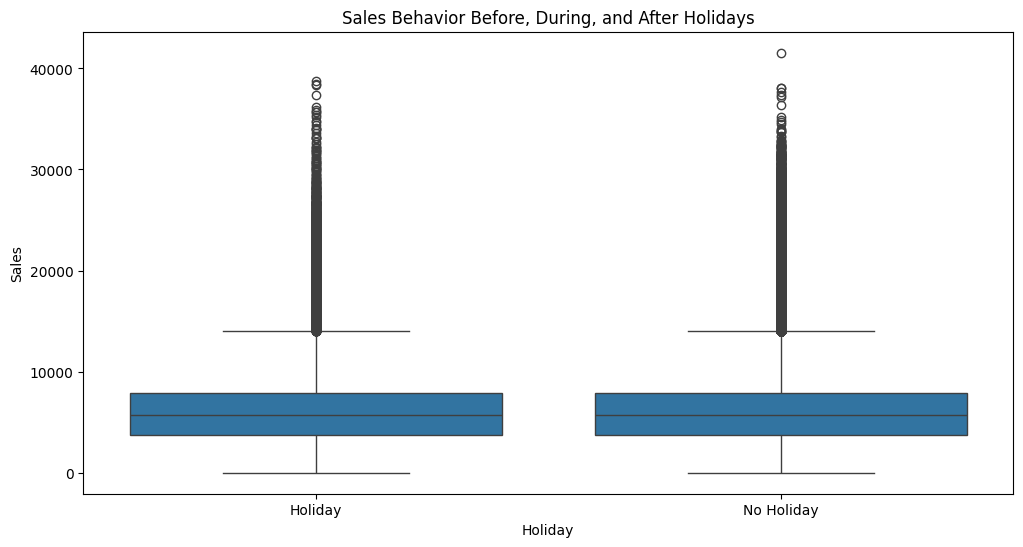

In [53]:
## 2. Sales behavior before, during, and after holidays
# Assuming `StateHoliday` and `SchoolHoliday` indicate holiday periods
train['Holiday'] = np.where((train['StateHoliday'] != '0') | (train['SchoolHoliday'] == 1), 'Holiday', 'No Holiday')

plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Holiday', y='Sales')
plt.title("Sales Behavior Before, During, and After Holidays")
plt.show()

logging.info("Sales behavior before, during, and after holidays visualized")

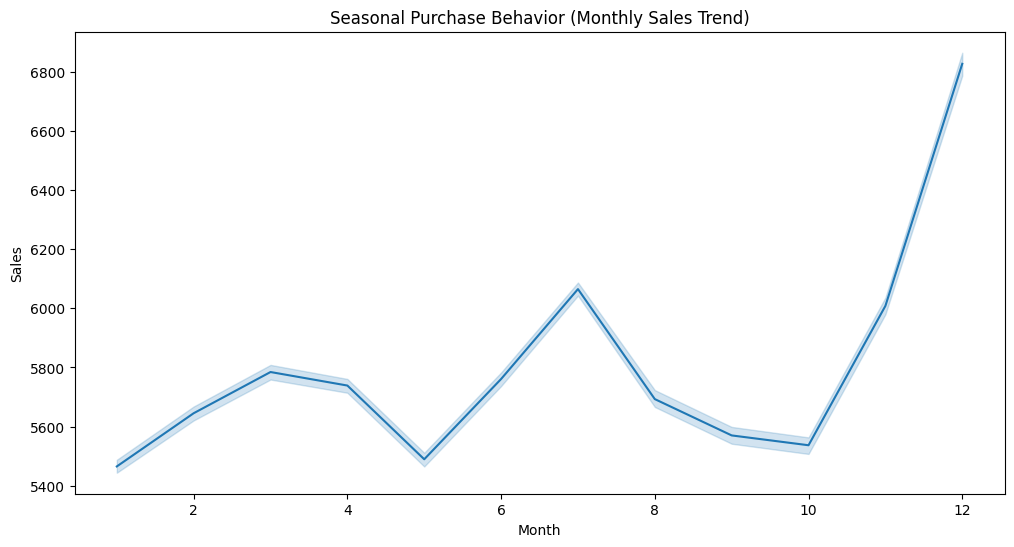

In [54]:
## 3. Seasonal purchase behaviors (e.g., Christmas, Easter)
train['Date'] = pd.to_datetime(train['Date'])
train['Month'] = train['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='Month', y='Sales')
plt.title("Seasonal Purchase Behavior (Monthly Sales Trend)")
plt.show()

logging.info("Seasonal purchase behavior visualized")

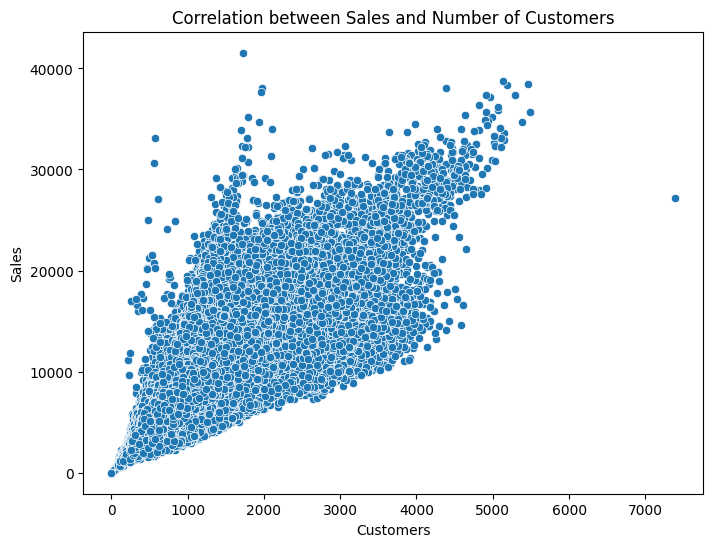

In [55]:

## 4. Correlation between sales and number of customers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Customers', y='Sales')
plt.title("Correlation between Sales and Number of Customers")
plt.show()

correlation = train['Sales'].corr(train['Customers'])
logging.info(f"Correlation between Sales and Customers: {correlation}")

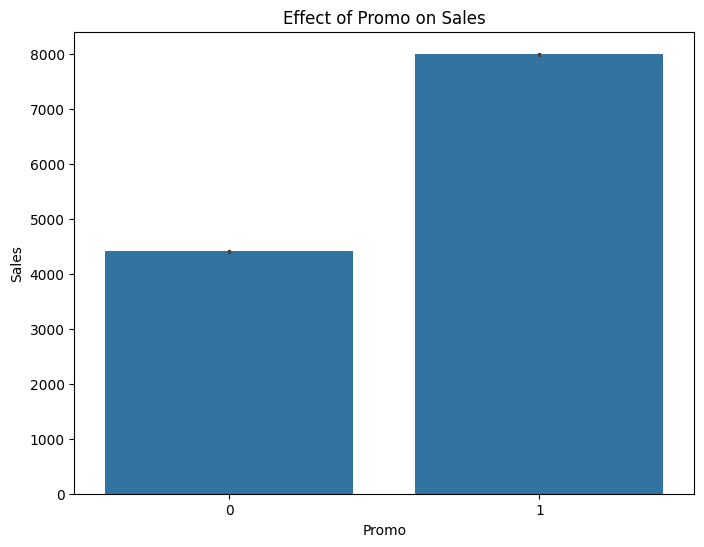

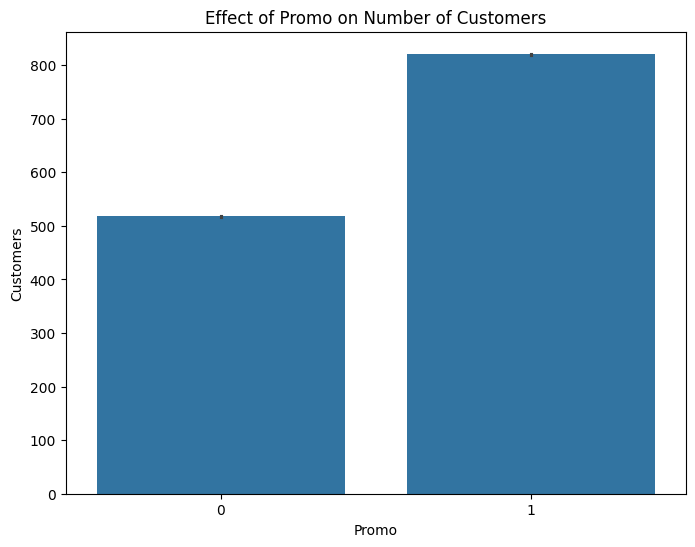

In [56]:


## 5. Promo effect on sales (Are promos attracting more customers?)
plt.figure(figsize=(8, 6))
sns.barplot(data=train, x='Promo', y='Sales')
plt.title("Effect of Promo on Sales")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=train, x='Promo', y='Customers')
plt.title("Effect of Promo on Number of Customers")
plt.show()

logging.info("Promo effects on sales and customer count visualized")

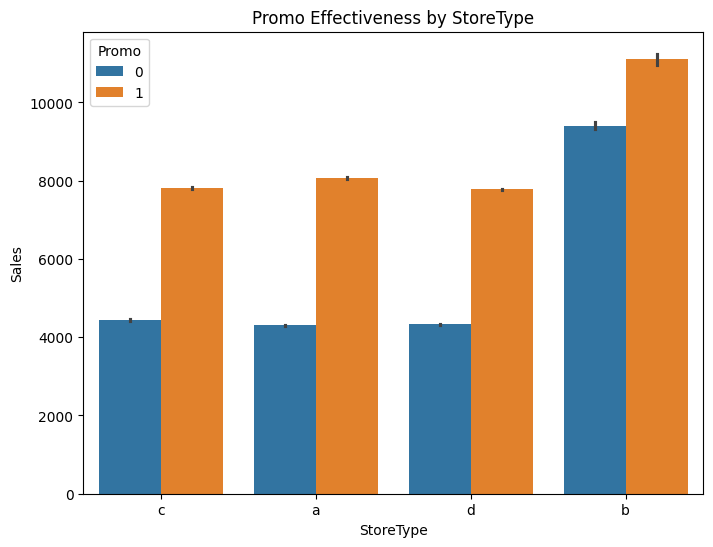

In [57]:
## 6. Deploying promos more effectively (e.g., by StoreType)
plt.figure(figsize=(8, 6))
sns.barplot(data=train, x='StoreType', y='Sales', hue='Promo')
plt.title("Promo Effectiveness by StoreType")
plt.show()

logging.info("Promo effectiveness by StoreType visualized")

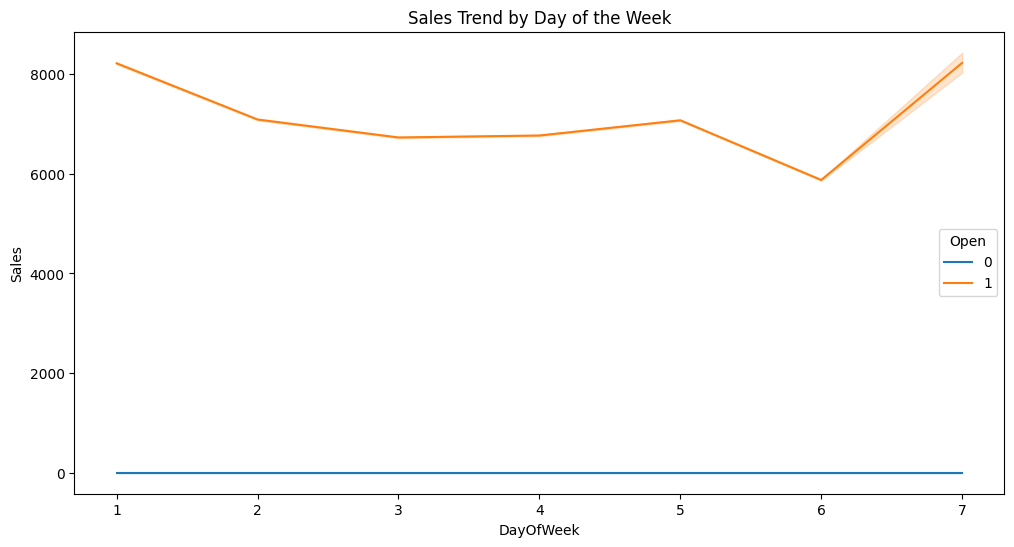

In [58]:

## 7. Trends of customer behavior during store opening and closing times
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='DayOfWeek', y='Sales', hue='Open')
plt.title("Sales Trend by Day of the Week")
plt.show()

logging.info("Customer behavior trends during store opening and closing times visualized")

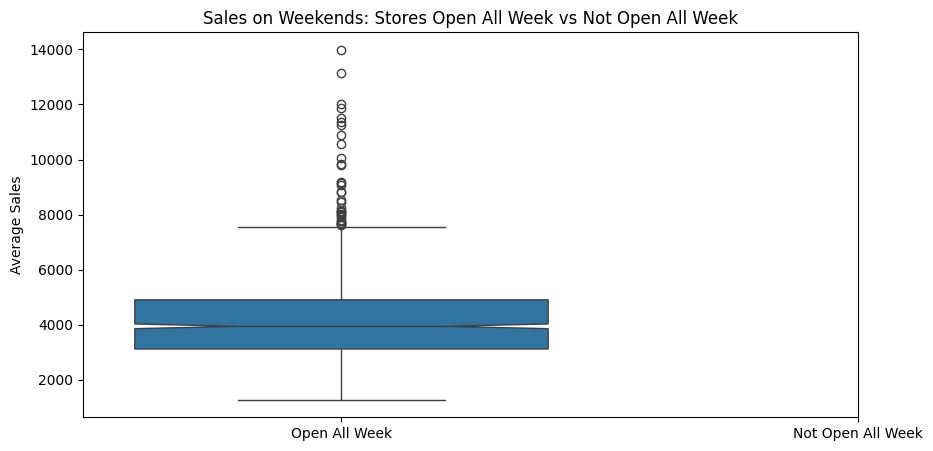

In [59]:
## 8. Stores open all weekdays vs weekend sales
# Find stores open all weekdays
stores_open_all_weekdays = train[train['Open'] == 1].groupby('Store')['DayOfWeek'].nunique()
weekday_open_stores = stores_open_all_weekdays[stores_open_all_weekdays == 7].index

# Compare sales on weekends for stores open all week vs those not open all week
weekend_sales = train[train['DayOfWeek'] >= 5].groupby('Store')['Sales'].mean()
open_weekend_sales = weekend_sales[weekend_sales.index.isin(weekday_open_stores)]
non_open_weekend_sales = weekend_sales[~weekend_sales.index.isin(weekday_open_stores)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=[open_weekend_sales, non_open_weekend_sales], notch=True)
plt.title("Sales on Weekends: Stores Open All Week vs Not Open All Week")
plt.xticks([0, 1], ['Open All Week', 'Not Open All Week'])
plt.ylabel("Average Sales")
plt.show()

logging.info("Sales comparison for stores open all week vs not open all week completed")

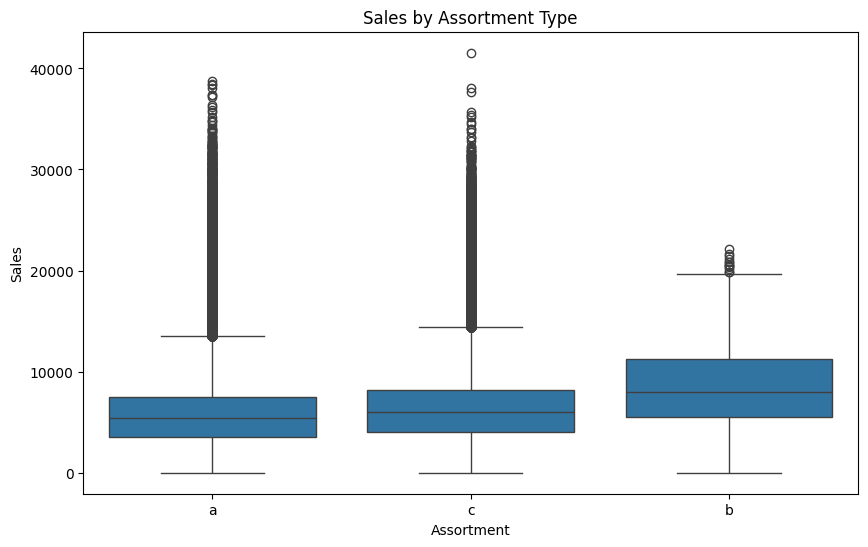

In [60]:
## 9. Assortment type effect on sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Assortment', y='Sales')
plt.title("Sales by Assortment Type")
plt.show()

logging.info("Assortment type effect on sales visualized")

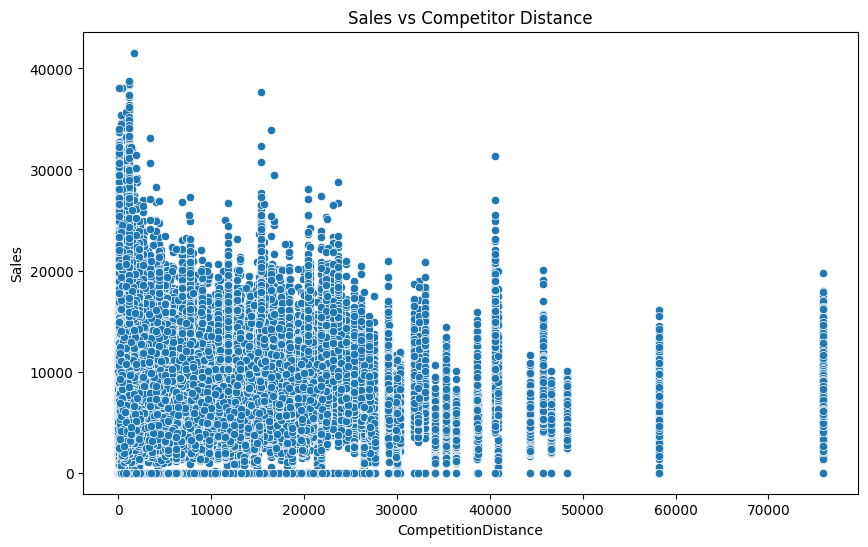

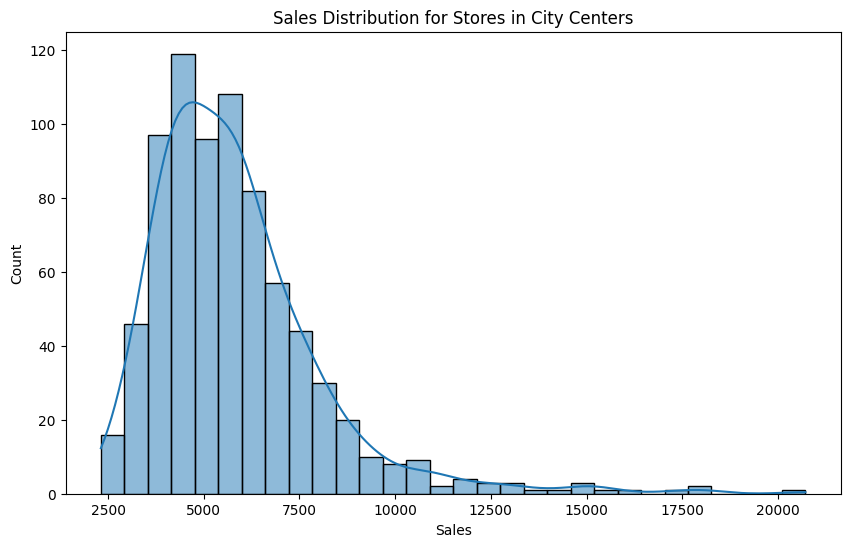

In [61]:

## 10. Competitor distance effect on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='CompetitionDistance', y='Sales')
plt.title("Sales vs Competitor Distance")
plt.show()

logging.info("Sales vs Competitor distance visualized")

# For city centers (assuming competitors very close, e.g., < 5km)
city_center_stores = train[train['CompetitionDistance'] < 5000]
city_center_sales = city_center_stores.groupby('Store')['Sales'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(city_center_sales, bins=30, kde=True)
plt.title("Sales Distribution for Stores in City Centers")
plt.show()

logging.info("City center stores' sales visualized")

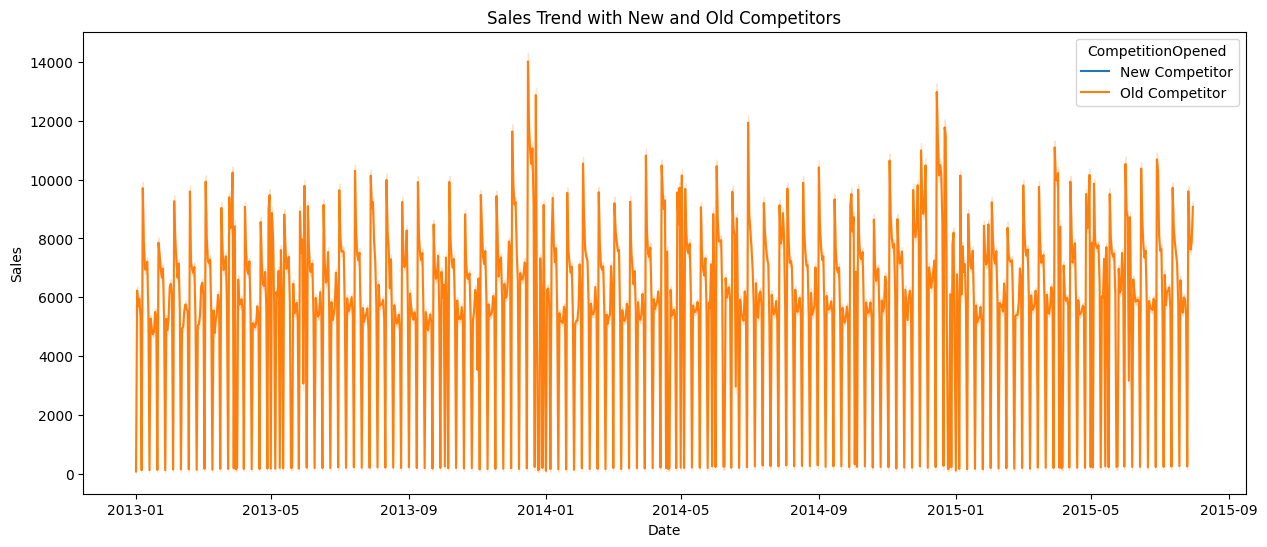

In [64]:
## 11. Opening or reopening of competitors
# Find stores that had NA in competition distance but later have values
# Step 1: Create a new column 'CompetitionOpened' with default values
train['CompetitionOpened'] = np.where(train['CompetitionDistance'].isna(), 'No Competitor', 'Old Competitor')

# Step 2: Mark stores where a new competitor appeared (previous row had no competitor, but current row does)
train['CompetitionOpened'] = np.where(
    train['CompetitionDistance'].notna() & train['CompetitionDistance'].shift(1).isna(), 
    'New Competitor', train['CompetitionOpened'])

# Step 3: Visualize the difference in sales trends based on the competition status
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x='Date', y='Sales', hue='CompetitionOpened')
plt.title("Sales Trend with New and Old Competitors")
plt.show()

logging.info("Sales trend with new and old competitors visualized")


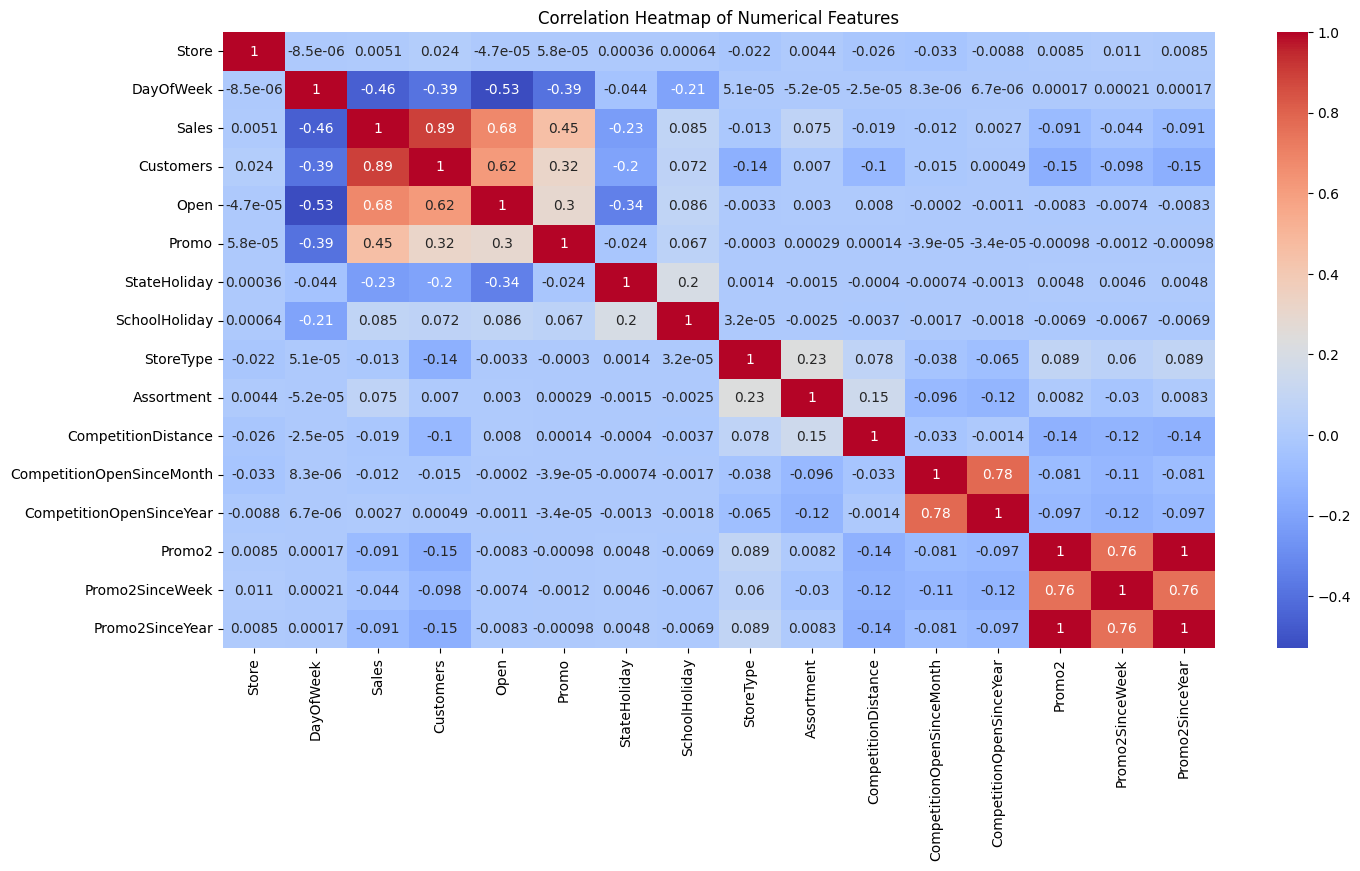

In [63]:
### Correlation Heatmap ###

# Step 1: Replace 'None' with np.nan
train.replace('None', np.nan, inplace=True)

# Step 2: Fill NaN values appropriately (you can choose another method if desired)
train.fillna(0, inplace=True)

# Step 3: Convert mixed data types into strings for categorical columns
train['StateHoliday'] = train['StateHoliday'].astype(str)
train['StoreType'] = train['StoreType'].astype(str)
train['Assortment'] = train['Assortment'].astype(str)

# Step 4: Encode categorical columns to numeric using label encoding
label_encoder = LabelEncoder()

train['StateHoliday'] = label_encoder.fit_transform(train['StateHoliday'])
train['StoreType'] = label_encoder.fit_transform(train['StoreType'])
train['Assortment'] = label_encoder.fit_transform(train['Assortment'])

# Step 5: Exclude non-numeric columns for the correlation heatmap
numeric_train = train.select_dtypes(include=['int64', 'float64'])

# Step 6: Generate the correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

logging.info("Correlation heatmap visualized")